In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway, t
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

def load_data(file_path):
    """Считывание данных из текстового файла"""
    data = pd.read_csv(file_path, sep='\t')  # Замените разделитель, если требуется
    return data

def build_model(X, y):
    """Построение ЛМФМ и расчет значимости факторов"""
    model = LinearRegression()
    model.fit(X, y)
    coefficients = model.coef_
    intercept = model.intercept_
    return model, coefficients, intercept

def factor_significance(X, y, significance_level):
    """Проверка значимости факторов с использованием t-теста"""
    n, k = X.shape
    model, coef, _ = build_model(X, y)
    predictions = model.predict(X)
    residuals = y - predictions
    mse = np.sum(residuals**2) / (n - k - 1)
    se = np.sqrt(np.diagonal(np.linalg.inv(X.T @ X) * mse))
    t_values = coef / se
    p_values = [2 * (1 - t.cdf(abs(t_val), df=n-k-1)) for t_val in t_values]
    significant_factors = [i for i, p in enumerate(p_values) if p < significance_level]
    return significant_factors, p_values

def check_multicollinearity(X):
    """Оценка мультиколлинеарности через VIF"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def evaluate_model(model, X, y):
    """Оценка качества модели"""
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return r2, rmse

def predict_new_data(model, new_data_path):
    """Прогноз на новых данных"""
    new_data = pd.read_csv(new_data_path, sep='\t')  # Замените разделитель, если требуется
    predictions = model.predict(new_data)
    return predictions

def visualize_results(y_train, y_pred, y_test=None, y_test_pred=None):
    """Визуализация результатов"""
    plt.figure(figsize=(12, 6))
    plt.plot(y_train, label="Обучающая выборка: реальное значение")
    plt.plot(y_pred, label="Обучающая выборка: прогноз", linestyle='--')
    if y_test is not None and y_test_pred is not None:
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Тестовая выборка: реальное значение")
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test_pred, label="Тестовая выборка: прогноз", linestyle='--')
    plt.legend()
    plt.title("Результаты модели")
    plt.xlabel("Итерации")
    plt.ylabel("Значение")
    plt.show()

# Пример вызова программы
if __name__ == "__main__":
    # 1. Загрузка данных
    file_path = "your_file_path.txt"
    data = load_data(file_path)

    # 2. Разделение на факторы и отклик
    y = data['y']  # Замените на название столбца отклика
    X = data.drop('y', axis=1)

    # 3. Оценка модели
    model, coef, intercept = build_model(X, y)

    # 4. Проверка значимости факторов
    significant_factors, p_values = factor_significance(X, y, significance_level=0.05)
    print("Значимые факторы:", significant_factors)

    # 5. Проверка мультиколлинеарности
    vif = check_multicollinearity(X)
    print(vif)

    # 6. Оценка модели
    r2, rmse = evaluate_model(model, X, y)
    print(f"Коэффициент детерминации R²: {r2}, RMSE: {rmse}")

    # 7. Визуализация
    y_pred = model.predict(X)
    visualize_results(y, y_pred)

FileNotFoundError: [Errno 2] No such file or directory: 'your_file_path.txt'

In [3]:
import pandas as pd

# Загрузим данные из файла для анализа
file_path = 'data/data_lab2.xlsx'

# Попробуем просмотреть первые строки всех листов файла
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

# Чтение и просмотр первых строк для каждого листа
sheets_preview = {sheet: excel_data.parse(sheet).head() for sheet in sheet_names}
sheet_names, sheets_preview

(['Отчет', 'Установленные разрезы'],
 {'Отчет':        год  Общий прирост постоянного населения  Число родившихся  \
  0  1990 г.                               608665           1988858   
  1  1991 г.                               240946           1794626   
  2  1993 г.                              -205827           1378983   
  3  1994 г.                               104070           1408159   
  4  1995 г.                              -168299           1363806   
  
     Возрастные коэффициенты смертности  \
  0                               11.19   
  1                               11.39   
  2                               14.48   
  3                               15.66   
  4                               14.97   
  
     Численность постоянного населения в среднем за год  
  0                                          147969406   
  1                                          148394216   
  2                                          148458777   
  3                             

In [4]:
# Загрузка данных с листа "Отчет"
data = excel_data.parse("Отчет")

# Проверим названия колонок и типы данных
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   год                                                 30 non-null     object 
 1   Общий прирост постоянного населения                 30 non-null     int64  
 2   Число родившихся                                    30 non-null     int64  
 3   Возрастные коэффициенты смертности                  30 non-null     float64
 4   Численность постоянного населения в среднем за год  30 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.3+ KB


(None,
        год  Общий прирост постоянного населения  Число родившихся  \
 0  1990 г.                               608665           1988858   
 1  1991 г.                               240946           1794626   
 2  1993 г.                              -205827           1378983   
 3  1994 г.                               104070           1408159   
 4  1995 г.                              -168299           1363806   
 
    Возрастные коэффициенты смертности  \
 0                               11.19   
 1                               11.39   
 2                               14.48   
 3                               15.66   
 4                               14.97   
 
    Численность постоянного населения в среднем за год  
 0                                          147969406   
 1                                          148394216   
 2                                          148458777   
 3                                          148407912   
 4                              

In [5]:
# Преобразуем год в числовой формат
data['год'] = data['год'].str.extract('(\d+)').astype(int)

# Добавляем лаги для факторов
lagged_data = data.copy()
lag_features = ['Число родившихся', 'Возрастные коэффициенты смертности', 
                'Численность постоянного населения в среднем за год']

for lag in [1, 2]:
    for feature in lag_features:
        lagged_data[f"{feature}_lag{lag}"] = lagged_data[feature].shift(lag)

# Удалим строки с NaN, образовавшиеся из-за лагов
lagged_data = lagged_data.dropna()

# Проверим результат
lagged_data.head()

,год,Общий прирост постоянного населения,Число родившихся,Возрастные коэффициенты смертности,Численность постоянного населения в среднем за год,Число родившихся_lag1,Возрастные коэффициенты смертности_lag1,Численность постоянного населения в среднем за год_lag1,Число родившихся_lag2,Возрастные коэффициенты смертности_lag2,Численность постоянного населения в среднем за год_lag2
2,1993,-205827,1378983,14.48,148458777,1794626.0,11.39,148394216.0,1988858.0,11.19,147969406.0
3,1994,104070,1408159,15.66,148407912,1378983.0,14.48,148458777.0,1794626.0,11.39,148394216.0
4,1995,-168299,1363806,14.97,148375787,1408159.0,15.66,148407912.0,1378983.0,14.48,148458777.0
5,1996,-263025,1304638,14.16,148160129,1363806.0,14.97,148375787.0,1408159.0,15.66,148407912.0
6,1997,-226480,1259943,13.73,147915361,1304638.0,14.16,148160129.0,1363806.0,14.97,148375787.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Определяем отклик и факторы
y = lagged_data['Общий прирост постоянного населения']
X = lagged_data.drop(columns=['год', 'Общий прирост постоянного населения'])

# Разделим на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем линейную регрессионную модель
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на обучающих и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

train_rmse, test_rmse, r2_train, r2_test

(133899.3986089389, 157561.9643329008, 0.8306460578866877, 0.7506433634964604)

In [1]:
import pandas as pd

In [6]:
from operator import index


df = pd.read_excel('data/сбор данных/11521200300010200002_Индексы_цен_на_первичном_рынке_жилья.xlsx', index_col='Год')

In [12]:
df_normalized = (df - df.min()) / (df.max() - df.min())

<Axes: xlabel='Год'>

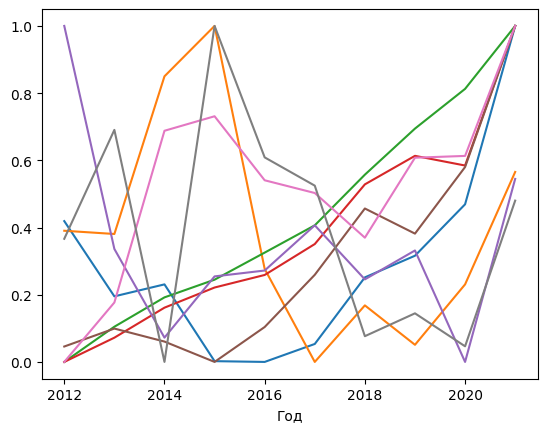

In [15]:
df_normalized.plot(legend=False)

In [18]:
# Вычисление матрицы корреляций
correlation_matrix = df.corr()
correlation_matrix

,Индексы цен на первичном рынке жилья,Индекс потребительских цен,Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций,Валовой внутренний продукт в рыночных ценах в соответствии с методикой СНС 2008,Индексы цен производителей на строительную продукцию,"Объем работ, выполненный собственными силами организаций, не относящихся к субъектам малого предпринимательства",Введено в действие общей площади жилых домов,Индексы тарифов на грузовые перевозки
Индексы цен на первичном рынке жилья,1.000000,0.021554,0.638961,0.688887,0.294711,0.829701,0.339810,-0.310649
Индекс потребительских цен,0.021554,1.000000,-0.289160,-0.228901,-0.097362,-0.255586,0.340203,0.347211
Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций,0.638961,-0.289160,1.000000,0.979987,-0.278362,0.930098,0.681020,-0.332962
Валовой внутренний продукт в рыночных ценах в соответствии с методикой СНС 2008,0.688887,-0.228901,0.979987,1.000000,-0.171518,0.949154,0.700765,-0.272174
Индексы цен производителей на строительную продукцию,0.294711,-0.097362,-0.278362,-0.171518,1.000000,-0.043214,-0.461420,0.240536
"Объем работ, выполненный собственными силами организаций, не относящихся к субъектам малого предпринимательства",0.829701,-0.255586,0.930098,0.949154,-0.043214,1.000000,0.544822,-0.317481
Введено в действие общей площади жилых домов,0.339810,0.340203,0.681020,0.700765,-0.461420,0.544822,1.000000,0.013406
Индексы тарифов на грузовые перевозки,-0.310649,0.347211,-0.332962,-0.272174,0.240536,-0.317481,0.013406,1.000000
